<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# Clusterização: K-Means - Pagamentos de Dívida

## Importação das bibliotecas

In [2]:
# Pacotes de preparação dos dados
import numpy as np
import pandas as pd

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de modelagem
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Importação da base de dados

In [3]:
df_pag = pd.read_csv('pagamento.csv')
df_pag.head()

,Pagou_Divida,Renda_Presumida,Idade
0,0,1583.33,19
1,0,1666.67,35
2,0,3583.33,26
3,0,4750.00,27
4,0,6333.33,19


## Preparação dos Dados

### Missing Values

In [4]:
df_pag.isnull().sum()

Pagou_Divida       0
Renda_Presumida    0
Idade              0
dtype: int64

### Duplicações

In [5]:
df_pag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pagou_Divida     400 non-null    int64  
 1   Renda_Presumida  400 non-null    float64
 2   Idade            400 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 9.5 KB


In [6]:
df_pag.duplicated().sum()

33

In [7]:
df_pag.loc[df_pag.duplicated()].sort_values('Renda_Presumida')

,Pagou_Divida,Renda_Presumida,Idade
150,0,1250.00,26
74,0,1500.00,32
23,1,1833.33,45
383,1,2333.33,49
390,1,2750.00,48
231,0,3500.00,39
393,1,3500.00,60
192,0,3583.33,29
195,0,3583.33,34
312,0,4166.67,38


In [8]:
df_pag.drop_duplicates(inplace=True)

In [9]:
df_pag.duplicated().sum()

0

### Tipos de Variáveis

In [10]:
df_pag.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pagou_Divida     367 non-null    int64  
 1   Renda_Presumida  367 non-null    float64
 2   Idade            367 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 11.5 KB


## Análise Exploratória dos Dados

### Dispersão por Classe

C:\Users\Thiago\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


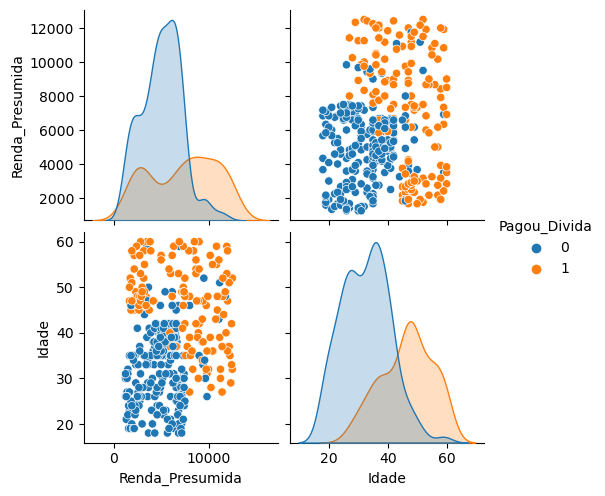

In [11]:
sns.pairplot(df_pag, 
             hue='Pagou_Divida');

C:\Users\Thiago\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


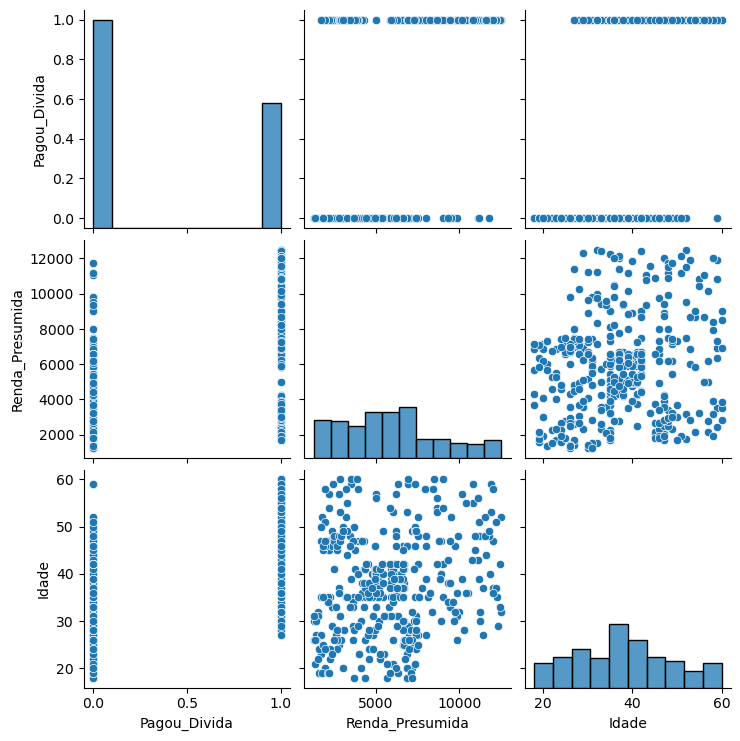

In [12]:
sns.pairplot(df_pag);

## Desenvolvimento do Modelo: K-Means

### Padronização da Escala

In [37]:
# Seleção das variáveis
df_modelo = df_pag[['Renda_Presumida', 
                    'Idade']].copy()

# Padronização da Escala
x_scaler = StandardScaler()
x_scaler.fit(df_modelo)

df_modelo_scaled = pd.DataFrame(x_scaler.transform(df_modelo),
                                index=df_modelo.index,
                                columns=df_modelo.columns)

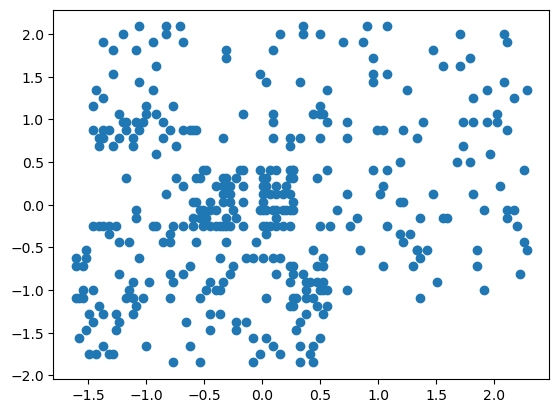

In [33]:
# Plotando Renda Presumida por Idade
plt.scatter(df_modelo_scaled['Renda_Presumida'],
            df_modelo_scaled['Idade']);

### Treinamento do Modelo
`Dica:` Utilize a função treina_modelo_kmeans para facilitar o treinamento e avaliação dos modelos com diferentes quantidades de clusters.

In [38]:
def treina_modelo_kmeans(df_scaled, k, plota_grafico=False):
    
    # Define e treina um modelo K-means
    modelo_km = KMeans(n_clusters=k, 
                       random_state=42)
    modelo_km.fit(df_scaled)
    
    # Obtém os clusters preditos
    cluster_predito = modelo_km.predict(df_scaled)
    
    # Plota os gráficos
    if plota_grafico:
        fig = plt.figure(figsize=(8,8))
        sns.scatterplot(x=df_scaled.iloc[:,0],                    
                        y=df_scaled.iloc[:,1],                    
                        hue=cluster_predito)
        
        sns.scatterplot(x=modelo_km.cluster_centers_[:,0],
                        y=modelo_km.cluster_centers_[:,1], 
                        marker='x', s=300, 
                        linewidth=4, color='red', zorder=10);

    return modelo_km , cluster_predito

#### Modelo com K=2

C:\Users\Thiago\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Thiago\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


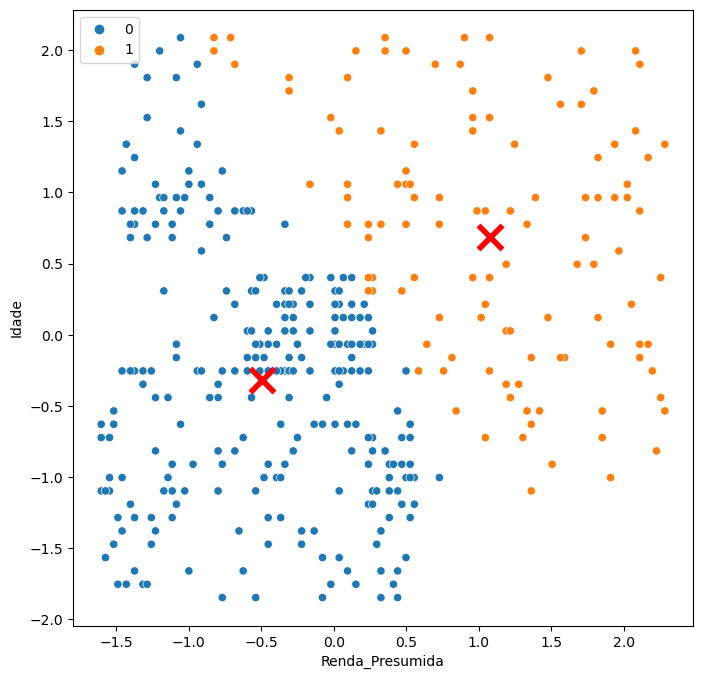

In [39]:
treina_modelo_kmeans(df_scaled=df_modelo_scaled, 
                     k=2,
                     plota_grafico=True);

#### Modelo com K=5

C:\Users\Thiago\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Thiago\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


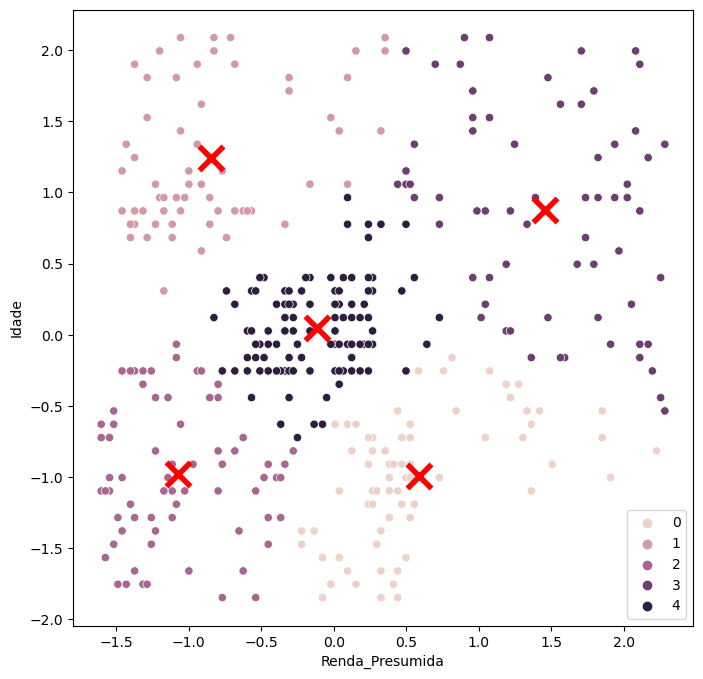

In [40]:
treina_modelo_kmeans(df_scaled=df_modelo_scaled, 
                     k=5,
                     plota_grafico=True);

#### Modelo com K=10

C:\Users\Thiago\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Thiago\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


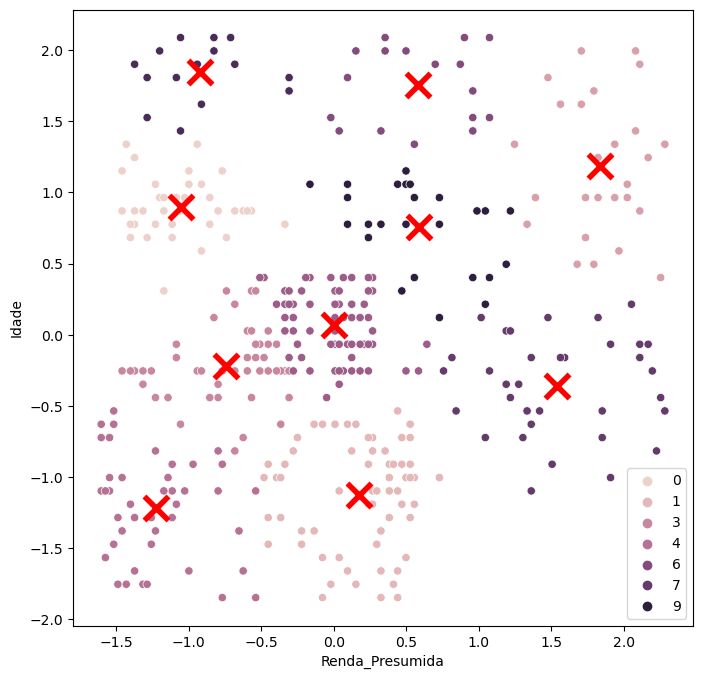

In [41]:
treina_modelo_kmeans(df_scaled=df_modelo_scaled, 
                     k=10,
                     plota_grafico=True);

### Identificação do número de clusters

C:\Users\Thiago\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Thiago\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Thiago\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Thiago\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

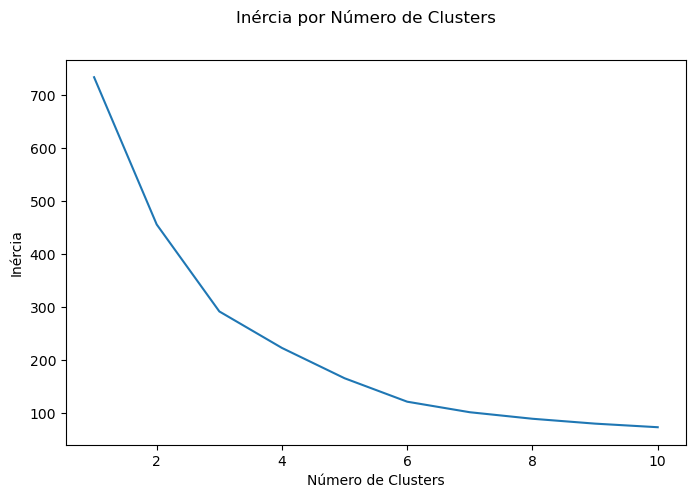

In [42]:
# Utilizando o Método do Cotovelo (Elbow-curve)
range_n_clusters = np.arange(1, 11)
inercia = []
n_clust = []

for num_clusters in range_n_clusters:
    n_clust.append(num_clusters)
    modelo, clust_pred = treina_modelo_kmeans(df_modelo_scaled, 
                                              k=num_clusters)
    inercia.append(modelo.inertia_)

fig = plt.figure(figsize=(8,5))
graf = sns.lineplot(x=n_clust, y=inercia);
graf.figure.suptitle('Inércia por Número de Clusters');
graf.set_xlabel('Número de Clusters');
graf.set_ylabel('Inércia');

### Novo Modelo K-Means com 3 Clusters (K=3)

C:\Users\Thiago\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Thiago\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


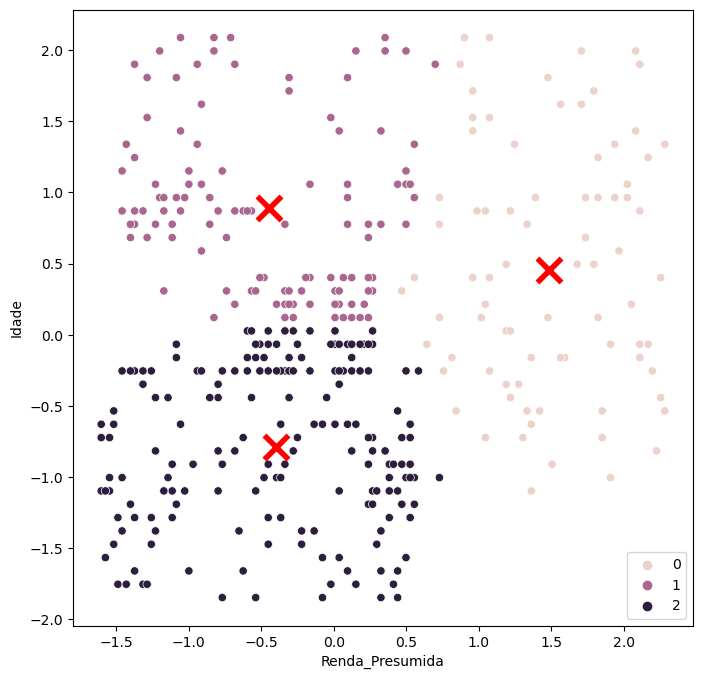

In [43]:
modelo_km3, cluster_predito = treina_modelo_kmeans(df_scaled=df_modelo_scaled, 
                                                   k=3, 
                                                   plota_grafico=True)

### Interpretação e Caracterização dos Clusters
**ATENÇÃO**: deve-se utilizar o método `predict` do modelo desenvolvido sobre o **DataFrame com as variáveis padronizadas** para identificar os clusters das observações no DataFrame original.

In [44]:
df_modelo['cluster'] = cluster_predito

In [45]:
df_modelo.groupby('cluster').describe().T

cluster                           0            1            2
Renda_Presumida count     81.000000   112.000000   174.000000
                mean   10177.984074  4597.470714  4732.758678
                std     1436.730220  1792.644237  1926.146958
                min     7250.000000  1666.670000  1250.000000
                25%     9000.000000  2979.167500  3020.832500
                50%    10000.000000  4833.335000  4916.670000
                75%    11416.670000  6166.670000  6416.670000
                max    12500.000000  7916.670000  8000.000000
Idade           count     81.000000   112.000000   174.000000
                mean      42.604938    47.232143    29.327586
                std        9.261046     6.351537     5.936235
                min       26.000000    39.000000    18.000000
                25%       35.000000    41.000000    25.000000
                50%       42.000000    47.000000    29.000000
                75%       49.000000    50.250000    35.000000
                max       60.000000    60.000000    38.000000

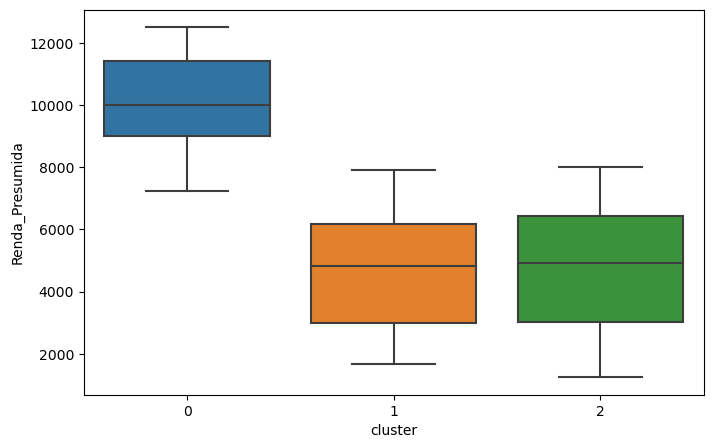

In [46]:
# Análise dos clusters em relação a Renda Presumida
fig = plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',
            y='Renda_Presumida', 
            data=df_modelo);

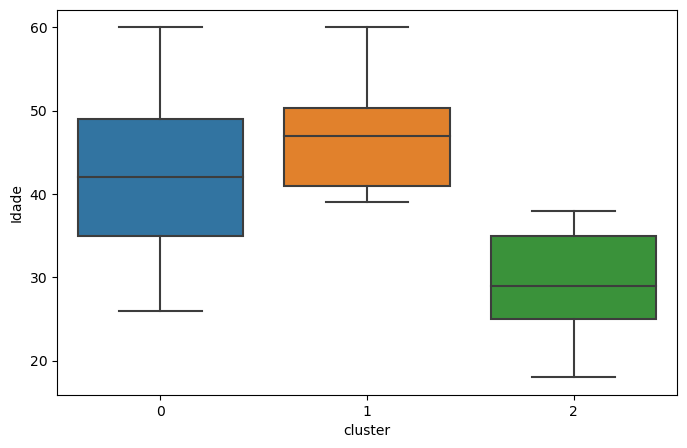

In [47]:
# Análise dos clusters em relação a Idade
fig = plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',
            y='Idade', 
            data=df_modelo);

### Avaliação dos Clusters em relação ao Pagamento
Como nesta base foram fornecidas as informações de Pagamento, avaliou-se também o percentual de clientes que pagou as dívidas em cada um dos clusters.

In [48]:
df_cluster_divida = pd.concat([df_modelo[['cluster']],
                               df_pag[['Pagou_Divida']]], 
                              axis=1)
df_cluster_divida.head()

,cluster,Pagou_Divida
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0


In [49]:
df_cluster_divida.pivot_table(values='Pagou_Divida', 
                              index='cluster')

,Pagou_Divida
cluster,
0,0.851852
1,0.571429
2,0.028736
